In [1]:
import modulation as modulate
import channel as chan
import numpy as np

from utilities import *

In [2]:
import matplotlib.pyplot as plt
import itertools
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from collections import defaultdict

In [25]:
def genKSignals(K, mode, size, snr):
    X = np.zeros((K, size),dtype=np.complex)
    for i in range(0, K):
        V = modulate.genmodsig(mode, burstSize)
        X[i] = chan.awgn(V, snr)
    return X

In [26]:
def genYTargets(sampleSize, nSignals):
    Y = np.concatenate([np.zeros(sampleSize)+k for k in range(0,nSignals)])
    return Y

In [48]:
modulationMethod = modulate.supportedModulation
burstSize = 1024
sampleSize = 1000

In [49]:
lowestSnr, highestSnr = (30, 31)
snrRange = np.arange(lowestSnr, highestSnr, 1)
snrToDatasetList = defaultdict(list)
snrToMatrixDataset = {}

for snr in snrRange:
    print(snr)
    for mode in modulationMethod:
        snrToDatasetList[snr].append(genKSignals(sampleSize, mode, burstSize, snr))
    snrToMatrixDataset[snr] = np.concatenate(snrToDatasetList[snr])
    
del snrToDatasetList

30


In [50]:
y = genYTargets(sampleSize, len(modulationMethod))

In [51]:
snrToTest = 30

In [52]:
X = snrToMatrixDataset[snrToTest]

In [53]:
X = np.hstack((X.real, X.imag))

[0.9972     0.99681231 0.99737455 0.99747097 0.99742   ]
[0.537816 0.629468 0.675992 0.698948 0.714448]


<module 'matplotlib.pyplot' from '/Users/wonderland/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

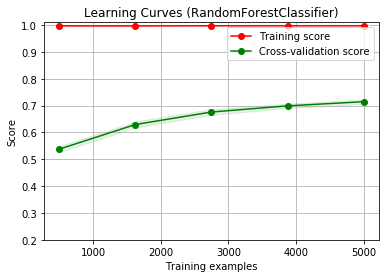

In [54]:
title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.5, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.2, 1.01), cv=cv, n_jobs=-1, scoreFunction="accuracy")

In [55]:
X_complex = snrToMatrixDataset[snrToTest]

0 2pam


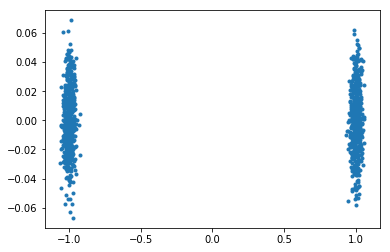

1 4pam


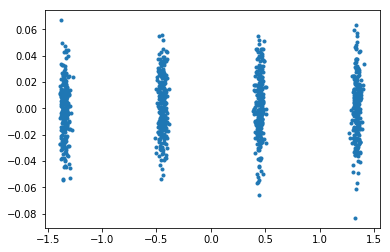

2 8pam


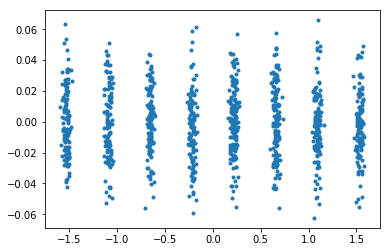

3 2psk


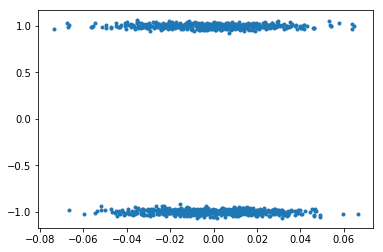

4 4psk


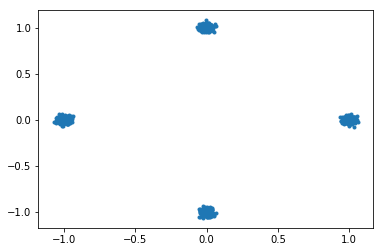

5 8psk


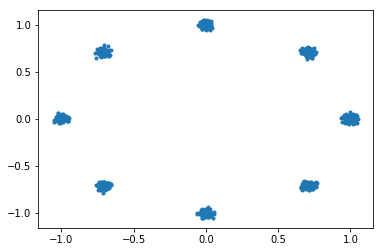

6 4qam


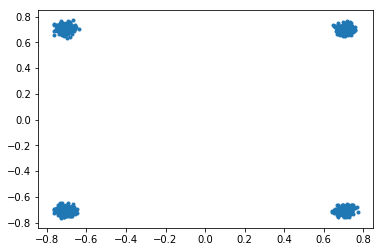

7 16qam


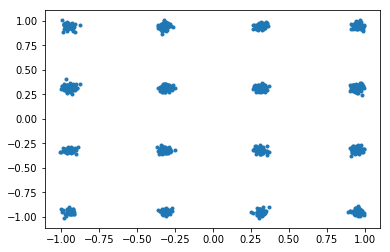

8 64qam


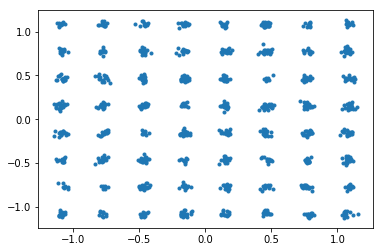

9 256qam


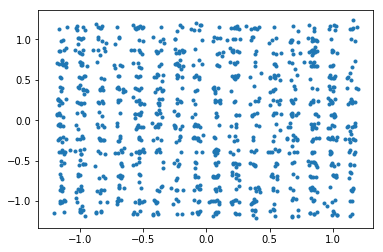

In [56]:
for k, modName in enumerate(modulate.supportedModulation):
    print(k, modName)
    plt.plot(X_complex[k*1001].real, X_complex[k*1001].imag, '.')
    plt.show()

In [ ]:
plt.plot(X[k*1001].real, X[k*1001].imag, '.')


In [16]:
X

array([[-0.87666735,  1.03605271, -0.91090614, ...,  0.05563515,
         0.09727722, -0.08446355],
       [ 0.95326123,  1.02922358,  0.89192536, ..., -0.0773917 ,
         0.03066548,  0.03495167],
       [ 1.08285093, -0.92515718, -1.14437506, ...,  0.02626665,
         0.03870371, -0.04153463],
       ...,
       [-0.76578466,  1.10739161,  1.10578476, ...,  0.35957484,
        -0.09546038,  0.16205204],
       [-0.21072105, -1.08623545, -0.71368799, ...,  0.4652804 ,
         0.80099026,  0.87888027],
       [ 0.83643148,  1.07852335,  0.95242458, ..., -1.10489534,
        -0.48608621,  0.10291061]])

In [33]:
np.savetxt('test.out', X, delimiter='\t')